### IMT 574 Final Project - Group 2 

Collaborators: Khoi Nguyen-Davis, Rahul Rastogi, Ankitha Ballal, Disha Santhosh

Dataset used: https://www.kaggle.com/datasets/jockeroika/life-style-data?resource=download

#### Data Loading and Overview

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv("/Users/dishasanthosh/Desktop/Group 2-IMT574/Data/Final_data.csv")

In [39]:
#checking the overall structure of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             20000 non-null  float64
 1   Gender                          20000 non-null  object 
 2   Weight (kg)                     20000 non-null  float64
 3   Height (m)                      20000 non-null  float64
 4   Max_BPM                         20000 non-null  float64
 5   Avg_BPM                         20000 non-null  float64
 6   Resting_BPM                     20000 non-null  float64
 7   Session_Duration (hours)        20000 non-null  float64
 8   Calories_Burned                 20000 non-null  float64
 9   Workout_Type                    20000 non-null  object 
 10  Fat_Percentage                  20000 non-null  float64
 11  Water_Intake (liters)           20000 non-null  float64
 12  Workout_Frequency (days/week)   

No missing values: every column shows 20,000 non-null entries.

Dtypes mix: 39 numerical (float64) and 15 categorical (object) 

In [40]:
pd.set_option('display.max_columns', None)
df.sample(5)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Daily meals frequency,Physical exercise,Carbs,Proteins,Fats,Calories,meal_name,meal_type,diet_type,sugar_g,sodium_mg,cholesterol_mg,serving_size_g,cooking_method,prep_time_min,cook_time_min,rating,Name of Exercise,Sets,Reps,Benefit,Burns Calories (per 30 min),Target Muscle Group,Equipment Needed,Difficulty Level,Body Part,Type of Muscle,Workout,BMI_calc,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
10950,21.12,Male,87.87,1.60,197.72,121.17,67.22,1.71,1332.77,Yoga,32.499586,3.48,4.02,2.99,34.32,3.01,-0.03,299.01,119.07,79.60,2344.0,Other,Dinner,Balanced,11.80,2171.69,210.09,406.15,Steamed,50.87,107.64,2.33,Plyometric Push-ups,4.01,18.87,Builds upper body strength,334.12,"Lower Back, Glutes",Kettlebell,Advanced,Forearms,Quads,Fat grip dumbbell curl,34.324219,2388.72,0.500703,1.355070,0.413410,0.612836,1011.23,59.312614,1142.6904,5.919246e+19,Low
4629,39.90,Female,57.82,1.69,184.09,156.06,52.89,1.17,840.29,Yoga,23.879419,2.41,4.01,1.97,20.24,1.97,-0.01,225.50,90.29,60.15,1564.0,Other,Lunch,Vegan,7.59,1497.77,283.84,477.07,Baked,22.31,92.47,1.73,Tricep Extensions,5.01,20.02,Strengthens shoulders,349.39,Shoulders,Bench or Chair,Advanced,Legs,Upper,Bicycle crunches,20.244389,1804.51,0.499859,1.561570,0.786357,0.847738,723.71,44.012920,817.5726,8.526809e+19,High
19701,44.80,Male,73.39,1.75,183.98,147.83,50.00,1.13,814.96,Yoga,26.558347,1.99,4.00,2.02,23.96,3.00,1.00,337.03,135.30,89.79,1978.0,Other,Breakfast,Paleo,36.20,1866.02,50.12,283.31,Raw,51.76,15.24,2.90,Inverted Rows,5.00,14.97,Targets abdominal muscles,352.28,"Triceps, Chest",Dumbbells or Barbell,Beginner,Arms,Grip Strength,Bent-over lateral raises,23.964082,2697.43,0.499779,1.843575,0.730184,0.803511,1163.04,53.898829,796.1528,9.120300e+19,High
7662,44.84,Female,65.70,1.68,195.45,128.78,66.27,0.77,760.91,Strength,25.247714,2.60,2.99,1.00,23.28,2.00,1.97,270.28,108.52,72.02,1910.0,Other,Breakfast,Keto,40.41,1401.74,120.81,431.04,Baked,13.59,45.92,1.48,Shoulder Press,4.00,16.91,Targets upper chest,335.94,"Back, Biceps",Cable Machine or Resistance Band,Intermediate,Chest,Grip Strength,Towel pull-up,23.278061,2163.38,0.499737,1.651750,0.483898,0.658890,1149.09,49.112252,517.3476,6.187783e+19,Low
18007,38.70,Female,55.68,1.71,184.07,148.31,58.84,1.96,2800.64,HIIT,18.546933,2.70,5.03,2.99,19.04,2.99,-0.00,205.00,81.53,54.85,1570.0,Other,Lunch,Vegan,7.47,1259.06,183.24,436.61,Raw,6.85,112.92,1.78,Lat Pulldowns,4.00,15.03,Improves core stability and balance,341.94,"Lower Abs, Hip Flexors",Resistance Band or Cable Machine,Advanced,Shoulders,Middle,Barbell curls,19.041756,1639.77,0.500070,1.464260,0.714445,0.805726,-1230.64,45.353068,1340.4048,7.150378e+19,Medium


In [41]:
#checking for invalid values
invalid_mask = df.isin(['?', 'n/a', 'N/A', 'na', 'NA', 'NaN'])
invalid_counts = invalid_mask.sum().sort_values(ascending=False)

invalid_counts[invalid_counts > 0]


Series([], dtype: int64)

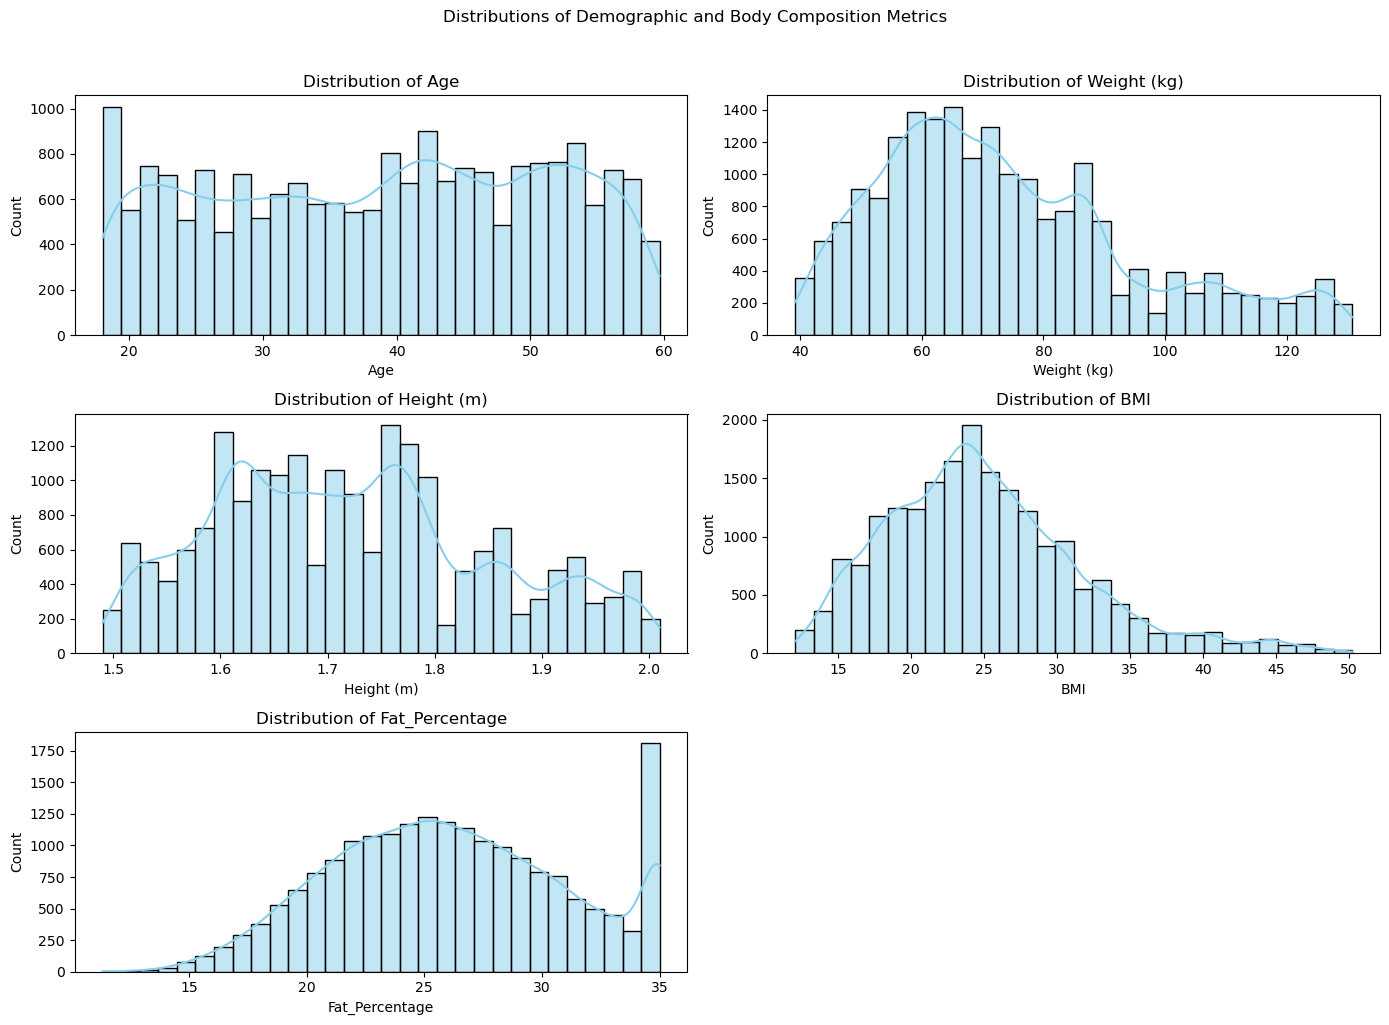

In [42]:
#study the distribution of demographics and health stats
demo_cols = ['Age', 'Weight (kg)', 'Height (m)', 'BMI', 'Fat_Percentage']

plt.figure(figsize=(14, 10))
for i, col in enumerate(demo_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {col}", fontsize=12)
    plt.xlabel(col)
    plt.ylabel("Count")
plt.suptitle("Distributions of Demographic and Body Composition Metrics",y=1.02)
plt.tight_layout()
plt.show()

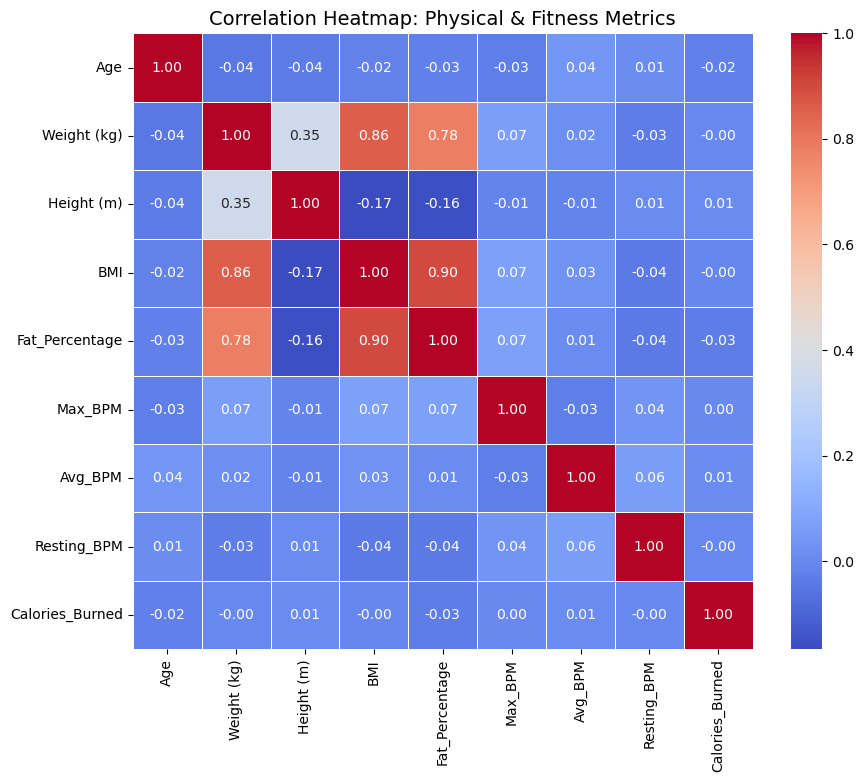

In [43]:
#checking correlation

physical_cols = [
    'Age', 'Weight (kg)', 'Height (m)', 'BMI', 'Fat_Percentage',
    'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Calories_Burned'
]

corr = df[physical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Physical & Fitness Metrics", fontsize=14)
plt.show()